In [2]:
import pickle
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from common import print_metric_names

# Simultaneous Mode Dropping

In [3]:
result_df = pd.read_csv("../results/result-tables/gaussian-mixture-simultaneous-mode-dropping.csv", index_col=False)
result_df.Metric = result_df.Metric.map(print_metric_names)
result_df

,Metric,metric_group,Sanity Check,repeat_ind,value,dim,drop_fraction
0,I-Prec,0,gaussian-mixture-simultaneous-mode-dropping,0,0.976000,1,0.000000
1,I-Rec,0,gaussian-mixture-simultaneous-mode-dropping,0,0.982000,1,0.000000
2,Density,0,gaussian-mixture-simultaneous-mode-dropping,0,0.984800,1,0.000000
3,Coverage,0,gaussian-mixture-simultaneous-mode-dropping,0,0.961000,1,0.000000
4,I-Prec,0,gaussian-mixture-simultaneous-mode-dropping,0,0.979000,1,0.020408
...,...,...,...,...,...,...,...
17995,P-Rec,2,gaussian-mixture-simultaneous-mode-dropping,9,0.641307,64,0.959184
17996,P-Prec,2,gaussian-mixture-simultaneous-mode-dropping,9,0.962985,64,0.979592
17997,P-Rec,2,gaussian-mixture-simultaneous-mode-dropping,9,0.425421,64,0.979592
17998,P-Prec,2,gaussian-mixture-simultaneous-mode-dropping,9,0.968652,64,1.000000


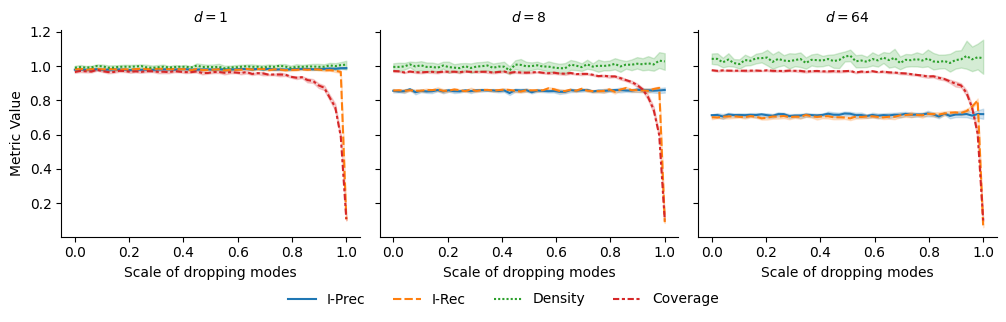

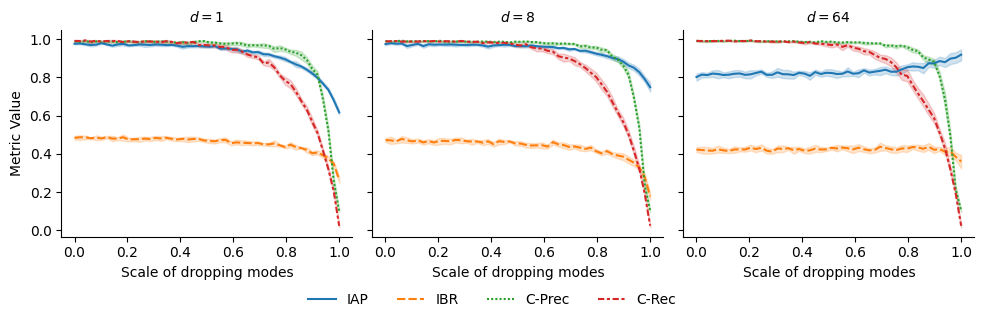

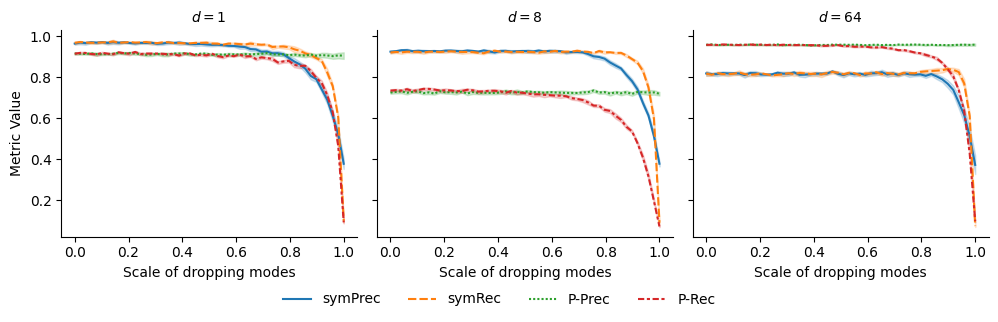

In [4]:
for i in range(3):
    subset_df = result_df[result_df.metric_group == i]
    g = sns.FacetGrid(subset_df, col="dim", sharex="col")
    g.map_dataframe(sns.lineplot, x="drop_fraction", y="value", hue="Metric", style="Metric")
    g.set_titles("$d = {col_name}$")
    g.set_xlabels("Scale of dropping modes")
    g.set_ylabels("Metric Value")
    g.add_legend()
    sns.move_legend(g, "upper center", bbox_to_anchor=(0.5, 0.05), ncol=4)
    plt.tight_layout()
    plt.savefig("../figures/mode_dropping/simultaneous_{}.pdf".format(i), bbox_inches="tight")
    plt.show()

# Sequential Mode Dropping

In [5]:
result_df = pd.read_csv("../results/result-tables/gaussian-mixture-sequential-mode-dropping.csv", index_col=False)
result_df.Metric = result_df.Metric.map(print_metric_names)
result_df

,Metric,metric_group,Sanity Check,repeat_ind,value,dim,n_dropped_modes
0,I-Prec,0,gaussian-mixture-sequential-mode-dropping,0,0.982000,1,0
1,I-Rec,0,gaussian-mixture-sequential-mode-dropping,0,0.983000,1,0
2,Density,0,gaussian-mixture-sequential-mode-dropping,0,0.983400,1,0
3,Coverage,0,gaussian-mixture-sequential-mode-dropping,0,0.955000,1,0
4,I-Prec,0,gaussian-mixture-sequential-mode-dropping,0,0.974000,1,1
...,...,...,...,...,...,...,...
3595,P-Rec,2,gaussian-mixture-sequential-mode-dropping,9,0.275605,64,7
3596,P-Prec,2,gaussian-mixture-sequential-mode-dropping,9,0.950688,64,8
3597,P-Rec,2,gaussian-mixture-sequential-mode-dropping,9,0.183487,64,8
3598,P-Prec,2,gaussian-mixture-sequential-mode-dropping,9,0.938390,64,9


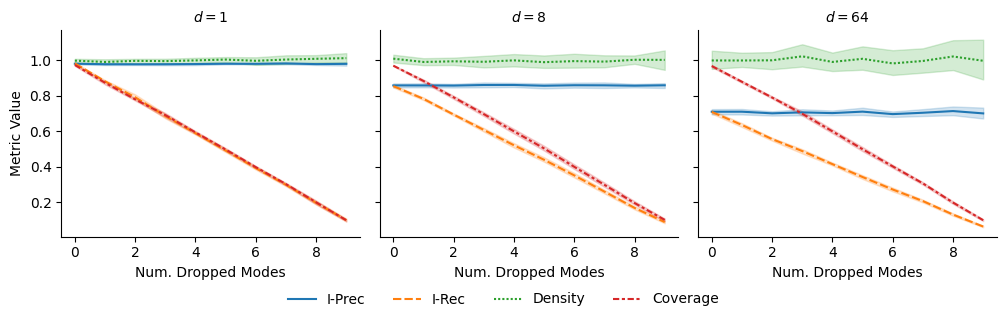

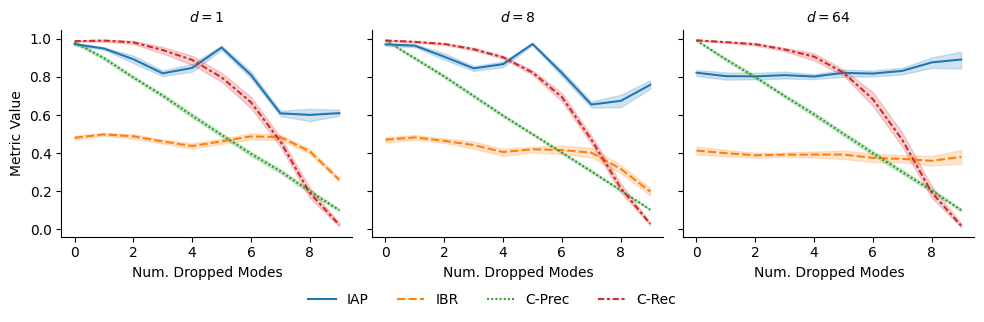

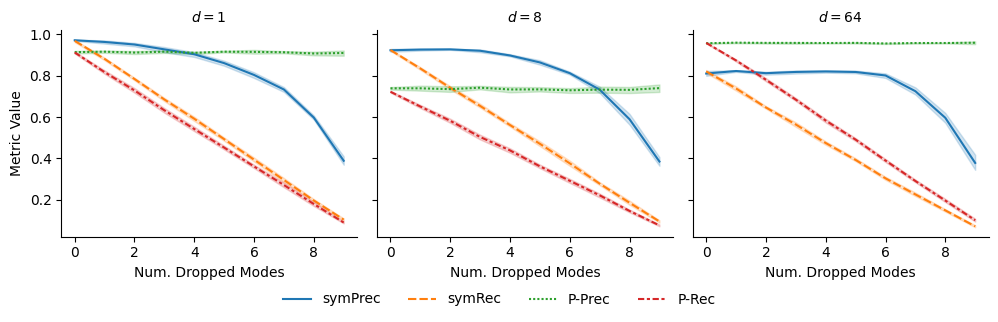

In [6]:
for i in range(3):
    subset_df = result_df[result_df.metric_group == i]
    g = sns.FacetGrid(subset_df, col="dim", sharex="col")
    g.map_dataframe(sns.lineplot, x="n_dropped_modes", y="value", hue="Metric", style="Metric")
    g.set_titles("$d = {col_name}$")
    g.set_xlabels("Num. Dropped Modes")
    g.set_ylabels("Metric Value")
    g.add_legend()
    sns.move_legend(g, "upper center", bbox_to_anchor=(0.5, 0.05), ncol=4)
    plt.tight_layout()
    plt.savefig("../figures/mode_dropping/sequential_{}.pdf".format(i), bbox_inches="tight")
    plt.show()

# Mode Dropping / Invention

In [7]:
result_df = pd.read_csv("../results/result-tables/gaussian-mixture-mode-dropping-invention.csv", index_col=False)
result_df.Metric = result_df.Metric.map(print_metric_names)
result_df

,Metric,metric_group,Sanity Check,repeat_ind,value,n_components_syn
0,I-Prec,0,gaussian-mixture-mode-dropping-invention,0,0.985000,1
1,I-Rec,0,gaussian-mixture-mode-dropping-invention,0,0.187000,1
2,Density,0,gaussian-mixture-mode-dropping-invention,0,1.058200,1
3,Coverage,0,gaussian-mixture-mode-dropping-invention,0,0.193000,1
4,I-Prec,0,gaussian-mixture-mode-dropping-invention,0,0.973000,2
...,...,...,...,...,...,...
1195,P-Rec,2,gaussian-mixture-mode-dropping-invention,9,0.824216,8
1196,P-Prec,2,gaussian-mixture-mode-dropping-invention,9,0.467843,9
1197,P-Rec,2,gaussian-mixture-mode-dropping-invention,9,0.833421,9
1198,P-Prec,2,gaussian-mixture-mode-dropping-invention,9,0.421555,10


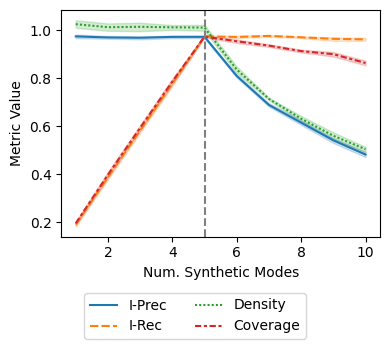

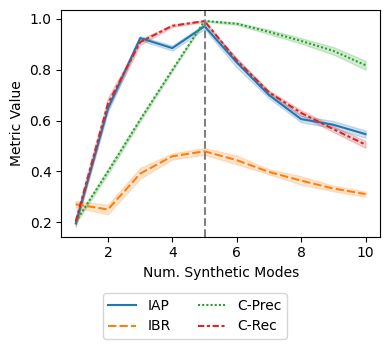

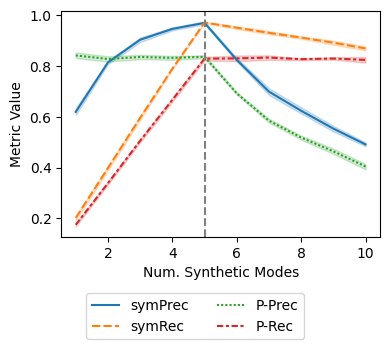

In [8]:
for i in range(3):
    subset_df = result_df[result_df.metric_group == i]
    fig, ax = plt.subplots(1, figsize=(4.0, 3.0))
    sns.lineplot(data=subset_df, x="n_components_syn", y="value", hue="Metric", style="Metric")
    plt.xlabel("Num. Synthetic Modes")
    plt.ylabel("Metric Value")
    plt.axvline(5, color="grey", linestyle="dashed")
    fig.legend()
    ax.get_legend().remove()
    sns.move_legend(fig, "upper center", bbox_to_anchor=(0.5, 0.03), ncol=2)
    plt.tight_layout()
    plt.savefig("../figures/mode_dropping/dropping_invention_{}.pdf".format(i), bbox_inches="tight")
    plt.show()

# One vs. Two Modes

In [9]:
result_df = pd.read_csv("../results/result-tables/one-vs-two-modes.csv", index_col=False)
result_df.Metric = result_df.Metric.map(print_metric_names)
result_df

,Metric,metric_group,Sanity Check,repeat_ind,value,dim,mu
0,I-Prec,0,one-vs-two-modes,0,0.9830,1,0.000000
1,I-Rec,0,one-vs-two-modes,0,0.9890,1,0.000000
2,Density,0,one-vs-two-modes,0,1.0208,1,0.000000
3,Coverage,0,one-vs-two-modes,0,0.9550,1,0.000000
4,I-Prec,0,one-vs-two-modes,0,0.9890,1,0.263158
...,...,...,...,...,...,...,...
7195,P-Rec,2,one-vs-two-modes,9,1.0000,64,4.473684
7196,P-Prec,2,one-vs-two-modes,9,0.0000,64,4.736842
7197,P-Rec,2,one-vs-two-modes,9,1.0000,64,4.736842
7198,P-Prec,2,one-vs-two-modes,9,0.0000,64,5.000000


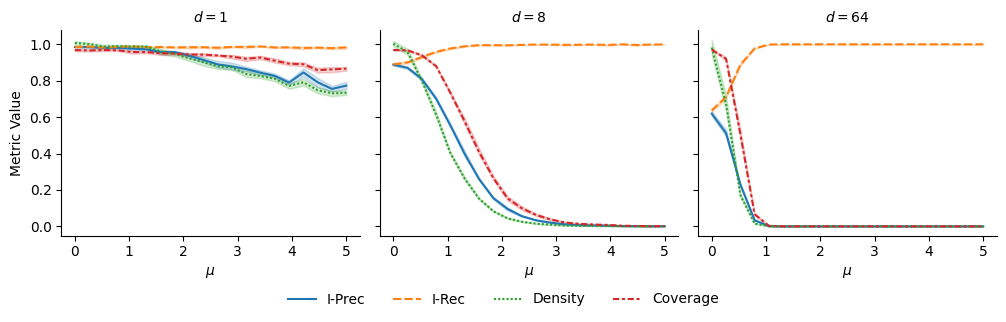

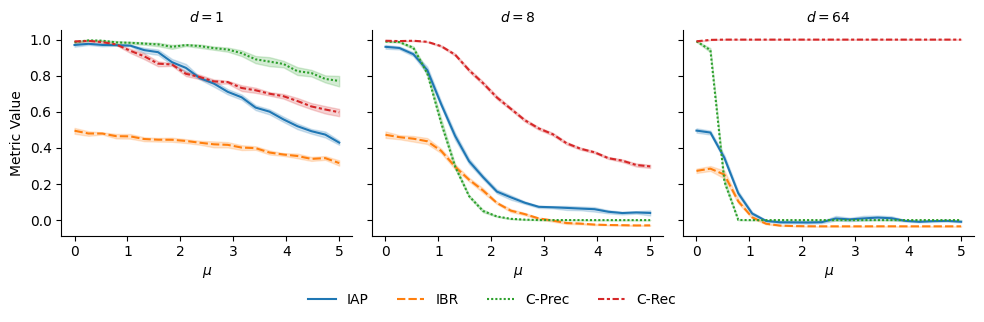

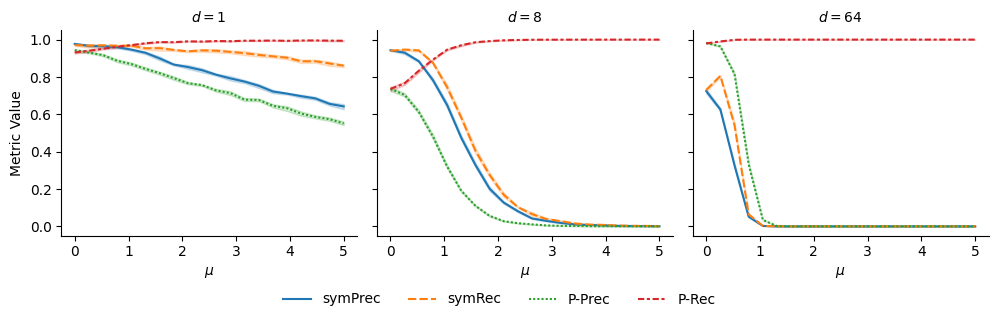

In [10]:
for i in range(3):
    subset_df = result_df[result_df.metric_group == i]
    g = sns.FacetGrid(subset_df, col="dim", sharex="col")
    g.map_dataframe(sns.lineplot, x="mu", y="value", hue="Metric", style="Metric")
    g.set_titles("$d = {col_name}$")
    g.set_xlabels("$\mu$")
    g.set_ylabels("Metric Value")
    g.add_legend()
    sns.move_legend(g, "upper center", bbox_to_anchor=(0.5, 0.05), ncol=4)
    plt.tight_layout()
    plt.savefig("../figures/mode_dropping/one_vs_two_modes_{}.pdf".format(i), bbox_inches="tight")
    plt.show()